#Project 2: Heart Disease Prediction - 16


##Group Members:

###Hasan Berkay Kürkçü
###Mustafa Kepenek
###İsmail Berat Düzenli
###Şevval Karadeniz

## Introduction

<font color="white">
In this Project, we are aiming to predict future heart diseases taking into account various
attributes like age, sex etc. Considering significance of early diagnosis with regards to human
health, we believe that aim of this project is significant for people.
</font>

## Utilized Datasets

<font color="white">
Used Additional Dataset:

https://www.kaggle.com/datasets/mazharkarimi/heart-disease-and-stroke-prevention

###Description:

It includes 85800 observations where observations consists of data of every USA state's rate of heart disease. This state's data is divided into groups of sex, race, age.

Originally columns were including ID's, data sources etc. However, we were not obviously interested in such stuff so we removed those columns. At the end data included state by state patients' heart disease percentages based on sex race age groups.
</font>

## Exploratory Data Analysis

In [456]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

from os.path import join

path_prefix = "./drive/My Drive/CS210 Proje"
fname = "heart_disease0.csv"

import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

df = pd.read_csv(join(path_prefix, fname))

fname2 = "location.csv"

df2 = pd.read_csv(join(path_prefix, fname2));

%matplotlib inline

import seaborn as sns
import math

df=df.set_axis(["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBloodSugar","RestingECG","MaxHR","ExcersizeAngina","OldPeak","ST_Slope","Ca","Thal","AHD"],axis=1)



Mounted at ./drive


In [457]:
df['AHD'] = df['AHD'].replace("Yes",1)  # String AHD values converted into 1's and 0's for visuals
df['AHD'] = df['AHD'].replace("No",0)

In [458]:
df['Sex'] = df['Sex'].replace(1,"Male") # 1's and 0's Sex values converted into string for visuals
df['Sex'] = df['Sex'].replace(0,"Female")

In [459]:
df['OldPeakx10'] = df['OldPeak']*10   # Purpose: inserting new column where float values of OldPeak is converted into int for the sake of visualizations

In [460]:
def categorical_Numerical(categorical, numerical, binsize, input=df): ## column name = categorical 

  values=['Range']
  values = values + list(df[categorical].unique())
  data = pd.DataFrame(columns = values).set_index('Range')

  max = df[numerical].max()
  min = df[numerical].min()

  jump = math.ceil((max-min)/binsize)

  min = int(min/jump)*jump
  max = math.ceil(max/jump)*jump

  for i in range(min,max,jump):
    interval = str(i)+"-"+str(i+jump-1)
    results= input[(input[numerical] >=i) & (input[numerical] < i+jump)]

    row=[]

    for i in values[1:]:
      row.append((results[categorical]==i).sum())

    data.loc[interval]=row
  
  return data 

In [461]:
def categorical_categorical(catx,caty='ChestPainType', ahdData = df):    ###creates dataframe of two categorical things an thier common numbers

  values=['variables']
  values = values + list(df[caty].unique())

  data = pd.DataFrame(columns = values).set_index('variables') 

  valuesx=df[catx].unique()

  for i in valuesx:
    
    row=[]
    row.append(i)

    for painType in values[1:]:

      row.append(((ahdData[caty]==painType) & (ahdData[catx]==i)).sum() )

    data.loc[i]=row[1:]

  return data

In [462]:
coloumns = df.columns  # Used to seperate categorical and numerical variables

categorical=[]
numerical=[]

for i in coloumns:
  if (df[i].nunique()<5):
    categorical.append(i)
  else :
    numerical.append(i)

numerical.remove('OldPeak')

### Visualize each attribute separately with respect to AHD


#### Numerical Ones 

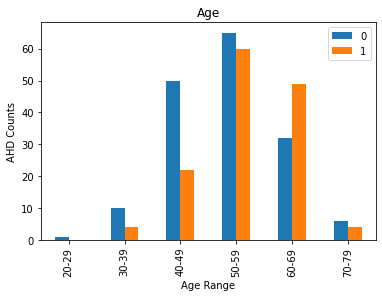

--------------------


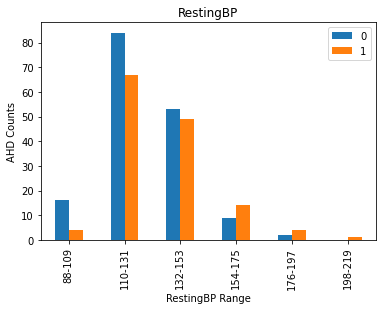

--------------------


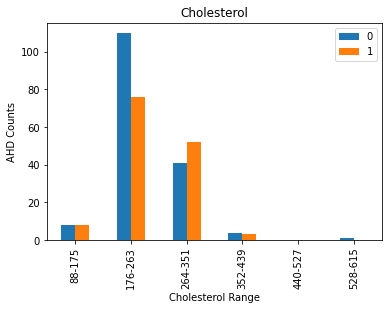

--------------------


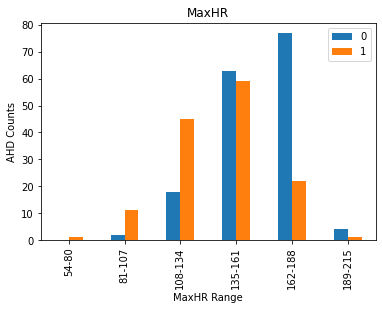

--------------------


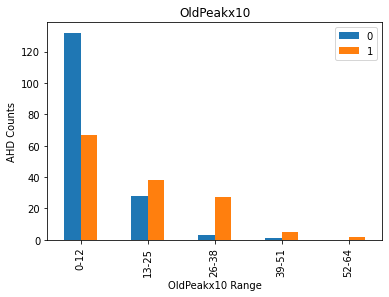

--------------------


In [463]:
for i in numerical:
  if i !='OldPeak':
    asd=categorical_Numerical('AHD',i,5)
    asd.plot(kind='bar', ylabel='AHD Counts', title = i, xlabel=i+' Range')
    plt.show()
    print("-"*20)

####Analyses:
  It seems that for Age, RestingBP, OldPeak parameters are directly proportional to AHD.
  
  For Cholesterol we are not sure but with the data given again direct proportion can be the case.

  For MaxHR seems like inverse proportion.

#### Categorical Ones

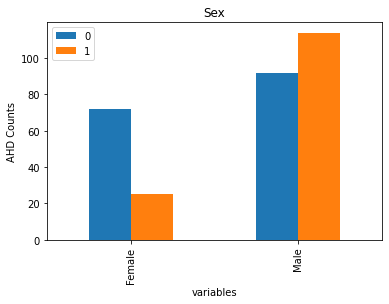

-----------------------------------------------------


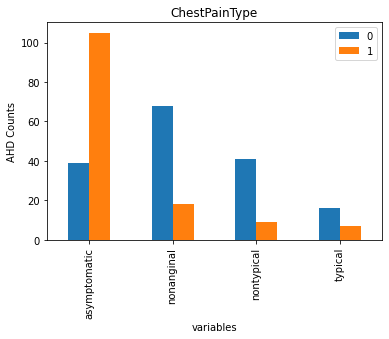

-----------------------------------------------------


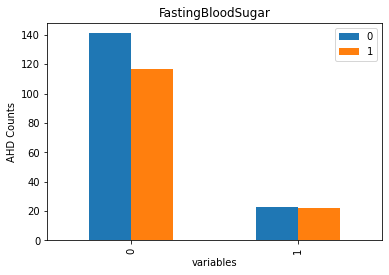

-----------------------------------------------------


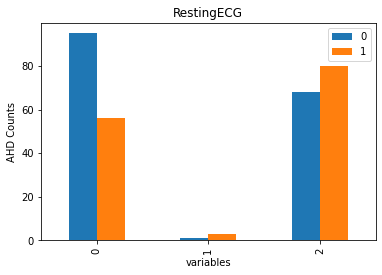

-----------------------------------------------------


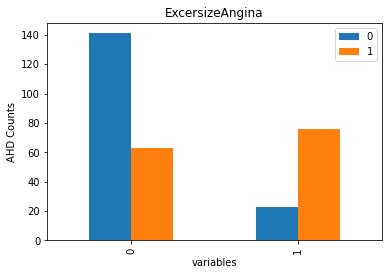

-----------------------------------------------------


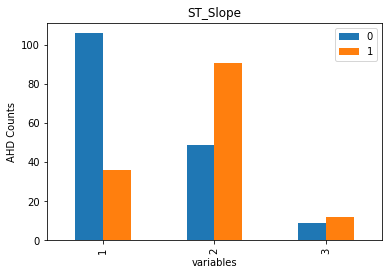

-----------------------------------------------------


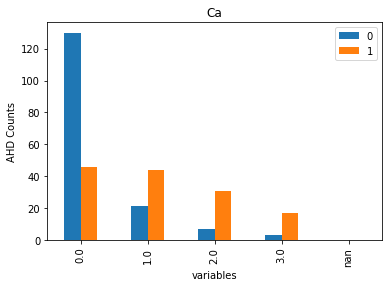

-----------------------------------------------------


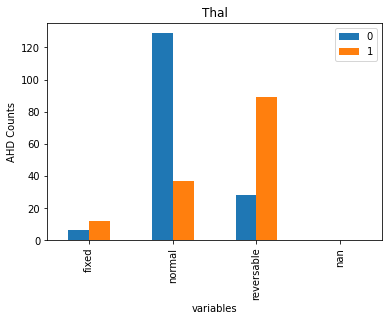

-----------------------------------------------------


In [464]:
for i in categorical[:-1]:

  asd = categorical_categorical(i,'AHD')
  asd=asd.sort_index()
  asd.plot(kind='bar', ylabel='AHD Counts', title = i )
  plt.show()

  print("-----------------------------------------------------")

####Analyses:
  ***Note for Nan Values: We concluded that removing Nan values does not make that much of a difference because there are few of them. ***

  For sex: Males have higher likelihood of death.

  For Chestpain: Asymptomatic cases have higher likelihood of death.

  For FastingBloodSugar (FBS): firstly, people with FBS bigger than 120 composes small amount of population. Secondly, we see slight difference with that parameter considering AHD.

  For RestingECG: As RestingECG values go from 0 to 2 (categorically) AHD ratio increases.

  For ExerciseAngina: When ExerciseAngina exists, AHD likelihood increases.

  For ST_Slope: As ST_Slope values go from 1 to 3 (categorically) AHD ratio increases.

  For Ca: As Ca values go from 0.0 to 3.0 (categorically) AHD ratio increases.

  For Thal: Here if patient does not have normal thalium measures, likelihood of AHD increases.




  



### Analyze Chol, Fbs and ExAng values with respect to age and sex


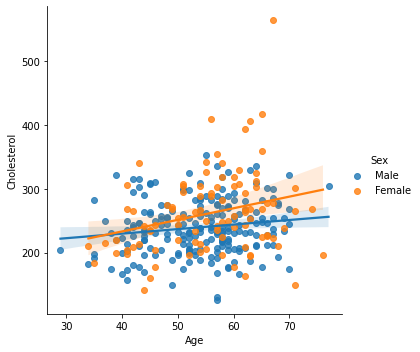

In [465]:
sns.lmplot(x="Age", y="Cholesterol", hue="Sex",data=df)

####Analyses:

#####As patients get older, women tend to have more chol values than men.
#####Also we have female outlier at 60-70 age group.

[Text(0, 0.5, 'Mean'), Text(0.5, 1.0, 'Fasting Blood Sugar')]

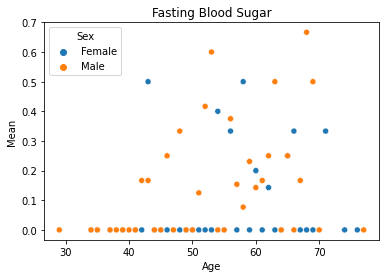

In [466]:
data = df.groupby(['Sex','Age'],as_index=False).FastingBloodSugar.mean() ### categorical

sns.scatterplot(x="Age", y="FastingBloodSugar", hue="Sex",data=data).set(title="Fasting Blood Sugar", ylabel='Mean' )

####Analyses:

#####As patients get older, men tend to have more increase ratios in terms of fasting blood sugar.

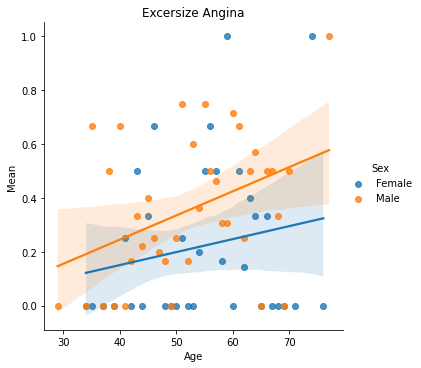

In [467]:
data = df.groupby(['Sex','Age'],as_index=False).ExcersizeAngina.mean()
sns.lmplot(x="Age", y="ExcersizeAngina", hue="Sex",data=data).set(title="Excersize Angina", ylabel='Mean' )

####Analyses:

#####As patients get older, men tend to have more increase ratios in terms of Excersise Angina.

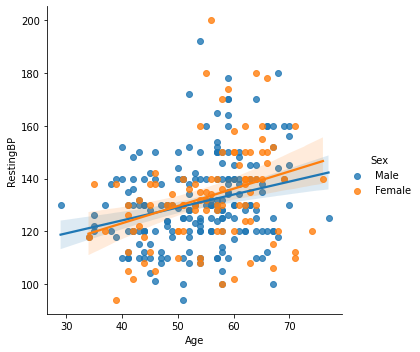

In [468]:
sns.lmplot(x="Age", y="RestingBP", hue="Sex",data=df)

####Analyses:

#####There is not much of a difference between sexes. However, still as patients get older ratios increase.

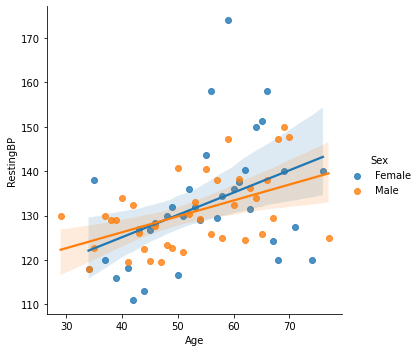

In [469]:
data = df.groupby(['Sex','Age'],as_index=False).RestingBP.mean()

sns.lmplot(x="Age", y="RestingBP", hue="Sex",data=data)

####Analyses:

#####There is not much of a difference between sexes. However, still as patients get older ratios increase.

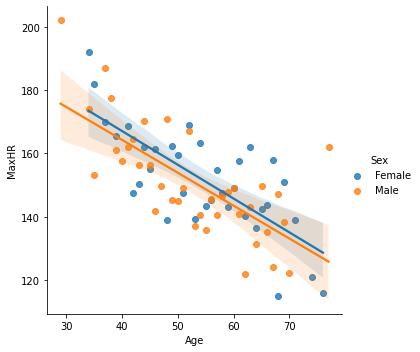

In [470]:
data = df.groupby(['Sex','Age'],as_index=False).MaxHR.mean()

sns.lmplot(x="Age", y="MaxHR", hue="Sex",data=data)

####Analyses:

#####There is not much of a difference between sexes. However, still as patients get older ratios decrease.

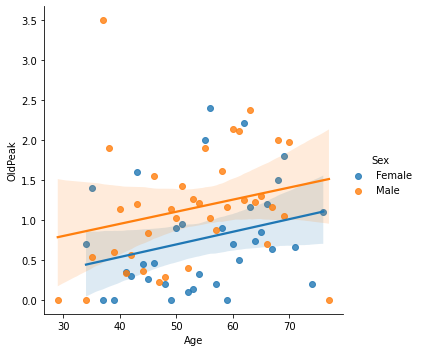

In [471]:
data = df.groupby(['Sex','Age'],as_index=False).OldPeak.mean()
sns.lmplot(x="Age", y="OldPeak", hue="Sex",data=data)

####Analyses:

##### Again as patients get older, ratio of Oldpeak increases but here we have bigger variance for male ones considering rectangle areas. 

####  Also male patients obviously have bigger OldPeaks than women.

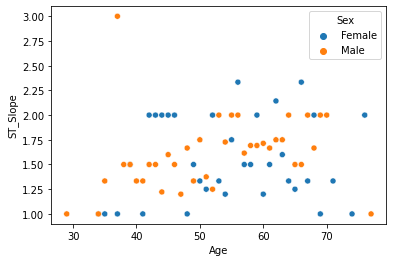

In [472]:
data = df.groupby(['Sex','Age'],as_index=False).ST_Slope.mean()

sns.scatterplot(x="Age", y="ST_Slope", hue="Sex",data=data)  

### NOTE: As slope can be considered as numerical (though it is categorical, values not that far from numerical), we thought that trend can be observed this way easily.

####Analyses:

##### Again as patients get older, Trend goes from upsloping to downsloping. (1--> upsloping, 2--> flat, 3--> downsloping)

##Analyze & visualize how each attribute changes with respect to age and sex

###Categorical

In [473]:
dataM=df[df["Sex"]=='Male']
dataF=df[df["Sex"]=='Female']

In [474]:
def categorical_Sex_Numerical_StackBarPlot(colName, numerical='Age'):
  malePlot = categorical_Numerical(colName,numerical, 5,dataM)
  femalePlot = categorical_Numerical(colName,numerical, 5,dataF)

  ax = malePlot.plot(kind='bar', ylabel='Counts',stacked=True, title = colName+' M-F', width=0.35, position=1)
  femalePlot.plot(ax=ax, kind='bar',stacked=True,legend=False, width=0.35, position = 0)

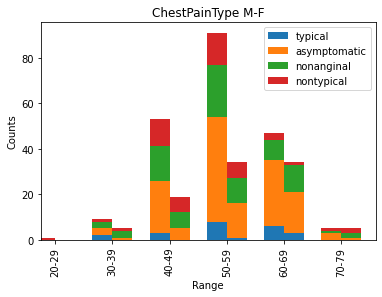

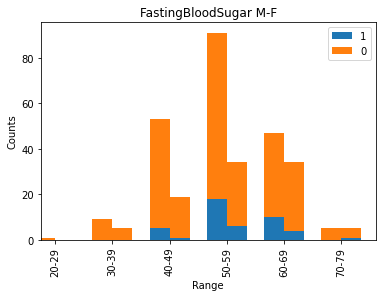

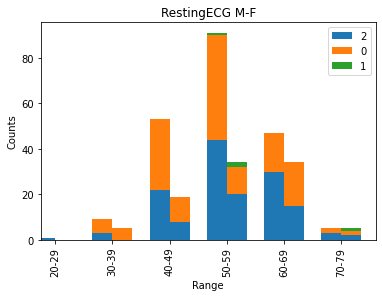

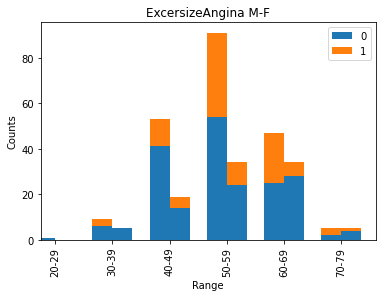

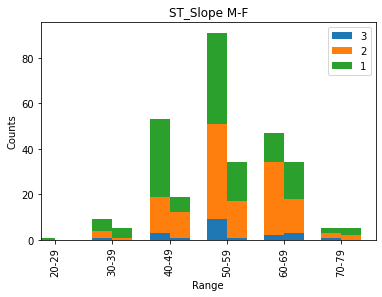

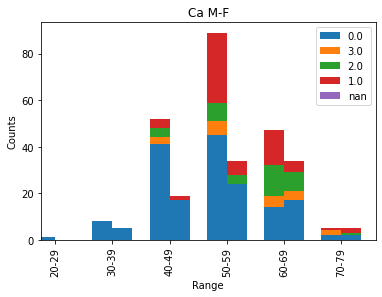

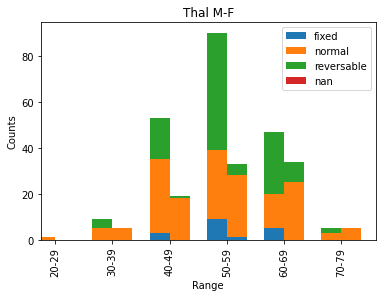

In [475]:
for i in categorical[1:-1]: ###categorical age-sex
  categorical_Sex_Numerical_StackBarPlot(i)

##### NOTE: Left columns represent males!

####Analyses:

##### 

##  Analyze & visualize the relationship between each attribute (without AHD) and chest pain 

### Numerical

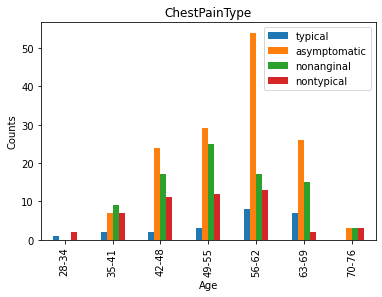

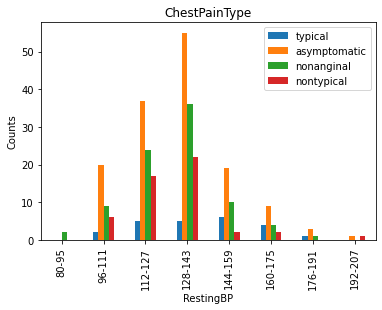

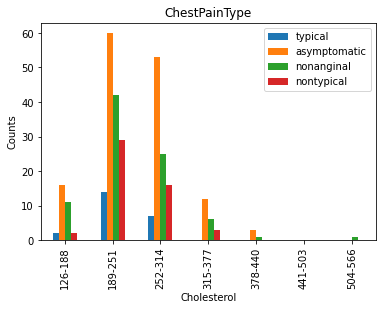

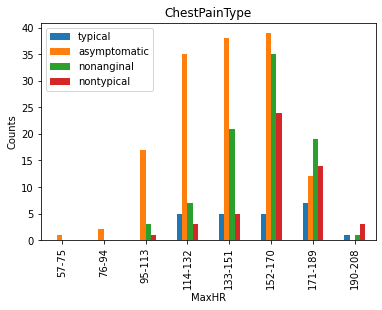

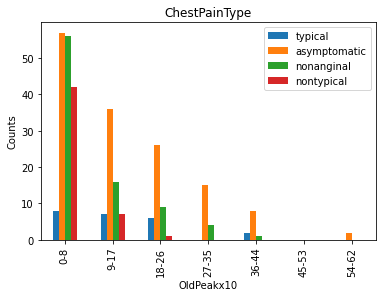

In [476]:
for i in numerical:
  if i!='OldPeak':
    asd =categorical_Numerical('ChestPainType', i, 7)
    asd.plot(kind='bar',xlabel=i, ylabel='Counts', title = 'ChestPainType')

##Analyses
  For age CPT (chest-pain-type): as age increases, asymptomatic rate dramatically increases.

  For RestingBP and Cholesterol we can say that CPT is not much affected from these parameters.

  For MaxHr and CPT: as MaxHr increases ratio of asymptomatic decrases while others increase.

  For OldPeak and CPT: as OldPeak increases ratio of asymptomatic increases compared to the other chest pain types.

### Categorical

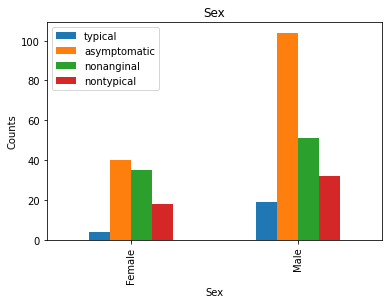

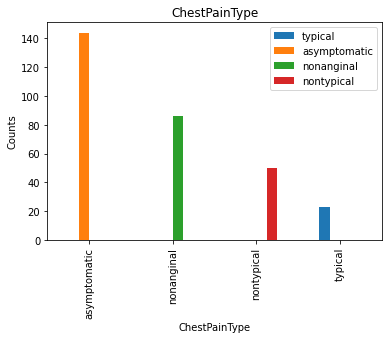

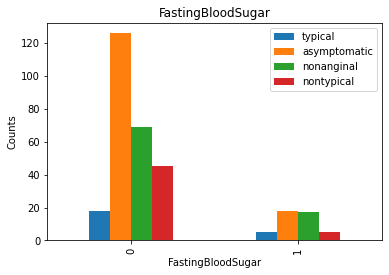

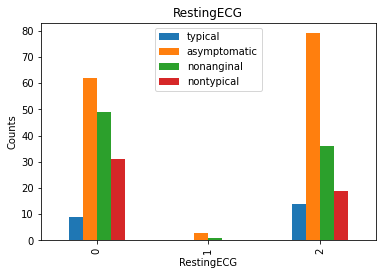

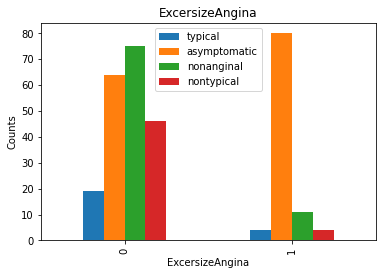

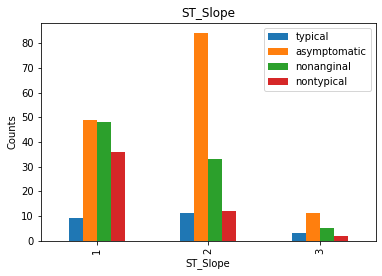

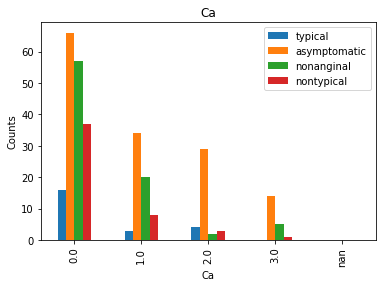

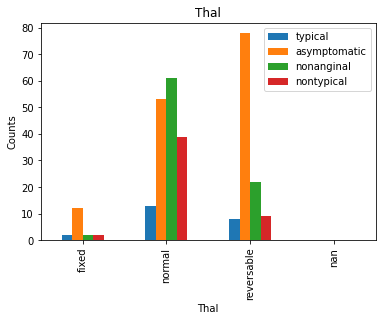

In [477]:
for i in categorical[:-1]:
  asd=categorical_categorical(i)
  asd=asd.sort_index()
  asd.plot(kind='bar',xlabel=i, ylabel='Counts', title = i)

## Analyses:

  for Sex: asymptomatic cases are much more for men than women. 

  for FastingBloodSugar: Ratio of asymptomatic decrases, whereas others do not see that much of a difference.

  for RestingECG: Firstly, number of patients with RestingECG 1 compose few of the data. Also, ratio of asymptomatic increases.

  for ExcerciseAngina: Ratio of asymptomatic dramatically increases when patients with EA compared to the others.

  for ST_Slope: Not deterministic.

  for Ca: As Ca categorically goes from 0.0 to 3.0 ratio of asymptomatic increases.

  for Thal: If patients Thal measures are not normal, asymptomatic CPT ratio is more than others. In other cases, asymptomatic is not that much.

In [478]:
def ourHeatmapCategorical(catx, caty):

  sickDf = df[df['AHD']==1]

  dataFull = categorical_categorical(caty,catx)

  dataSick=categorical_categorical(caty,catx, sickDf)

  dataFull=dataFull.replace(0,1)

  dataPlot = dataSick/dataFull

  dataPlot.head()

  dataPlot=dataPlot.fillna(1)
  
  dataPlot=dataPlot.sort_index(axis=0, ascending=False)
  dataPlot=dataPlot.sort_index(axis=1)

  plt.figure()
  plt.title(catx+" - "+caty)
  heatmap = sns.heatmap(data=dataPlot, annot = True, cmap="BuPu",vmin=0, vmax=1)

  plt.yticks(rotation=0)
  heatmap.set(xlabel=catx, ylabel=caty )
  plt.show()



## Analyze & visualize the relationship between two selected attributes, as well as whether they would lead to disease or not
### Categorical Categorical and AHD

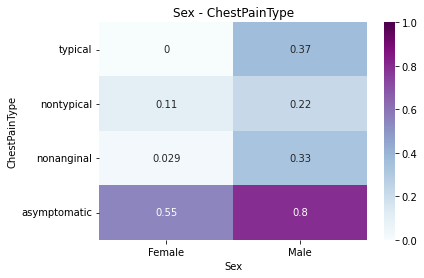

--------------------------------------------------


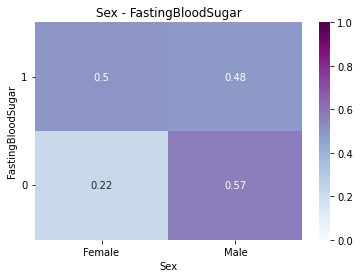

--------------------------------------------------


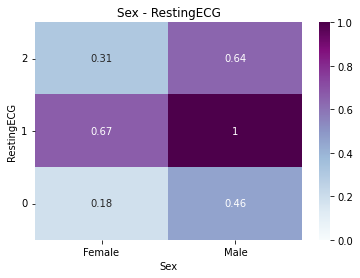

--------------------------------------------------


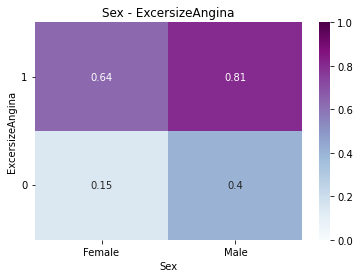

--------------------------------------------------


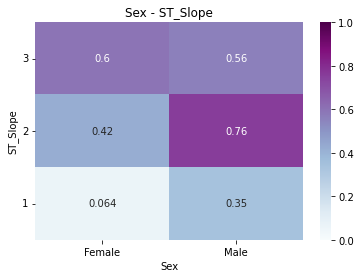

--------------------------------------------------


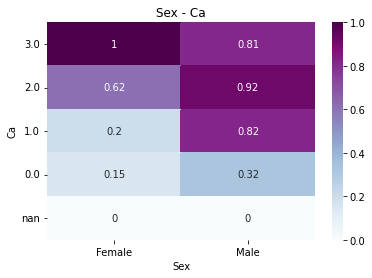

--------------------------------------------------


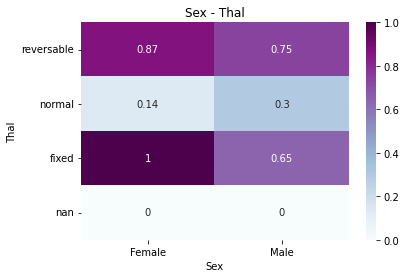

--------------------------------------------------


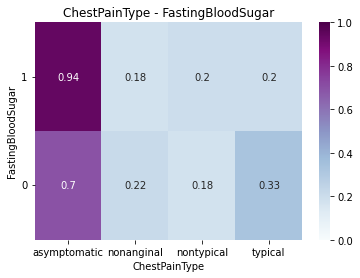

--------------------------------------------------


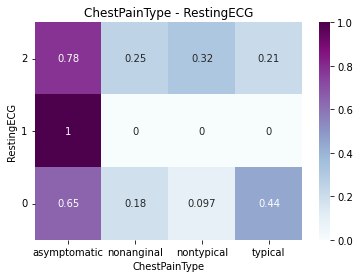

--------------------------------------------------


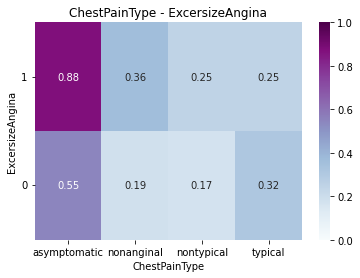

--------------------------------------------------


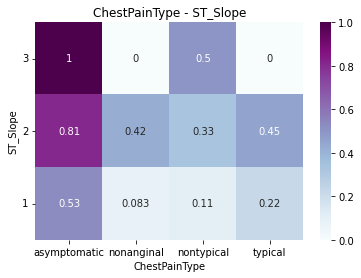

--------------------------------------------------


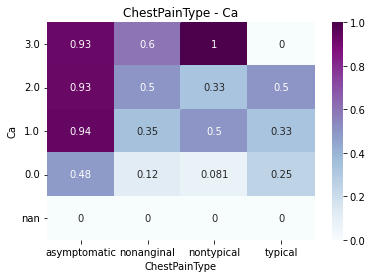

--------------------------------------------------


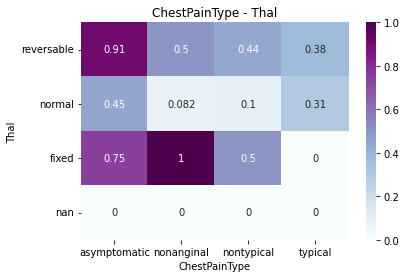

--------------------------------------------------


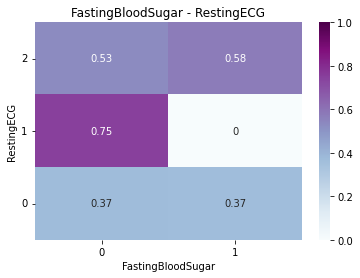

--------------------------------------------------


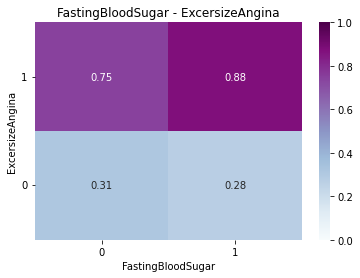

--------------------------------------------------


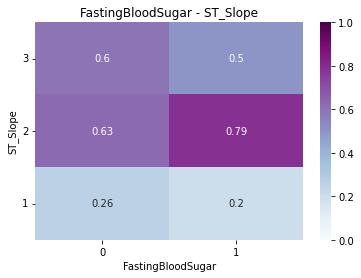

--------------------------------------------------


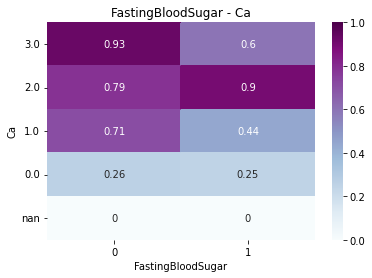

--------------------------------------------------


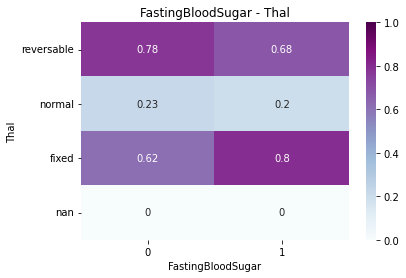

--------------------------------------------------


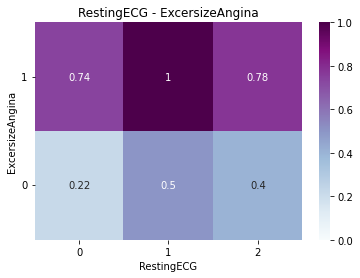

--------------------------------------------------


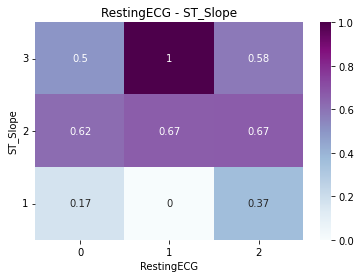

--------------------------------------------------


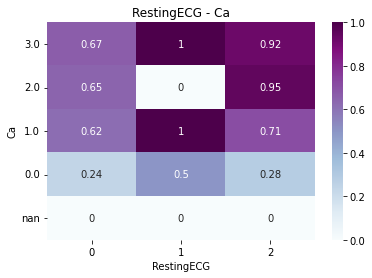

--------------------------------------------------


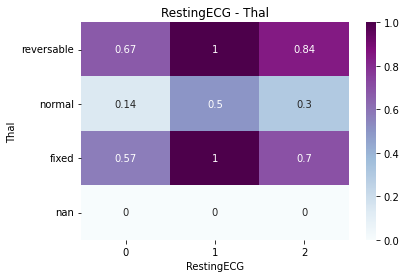

--------------------------------------------------


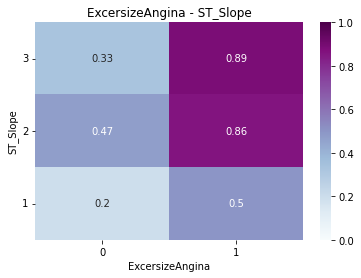

--------------------------------------------------


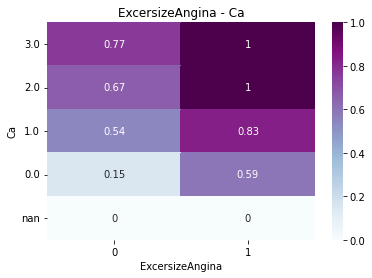

--------------------------------------------------


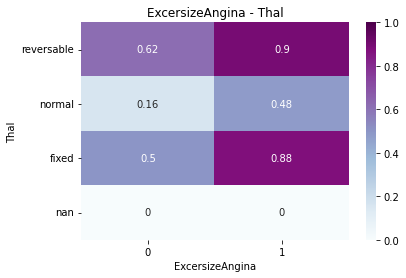

--------------------------------------------------


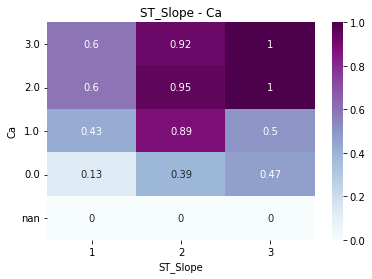

--------------------------------------------------


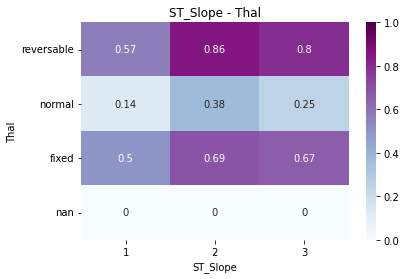

--------------------------------------------------


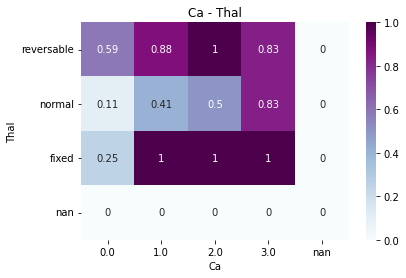

--------------------------------------------------


In [479]:
for i,x in enumerate(categorical[:-1]):
  for y in categorical[i+1:-1]:
    ourHeatmapCategorical(x, y)
    print("-"*50)

In [480]:
def ourHeatmapNumerical(catN, catC):

  sickDf = df[df['AHD']==1]

  dataFull = categorical_Numerical(catC,catN,7)

  dataSick=categorical_Numerical(catC,catN, 7, sickDf)

  dataFull=dataFull.replace(0,1)

  dataPlot = dataSick/dataFull

  dataPlot=dataPlot.fillna(1)

  dataPlot = dataPlot.reindex(index=dataPlot.index[::-1])

  plt.figure()
  plt.title(catN+" - "+catC)

  heatmap = sns.heatmap(data=dataPlot, annot = True, cmap="BuPu")
  plt.yticks(rotation=0)
  heatmap.set(xlabel=catC, ylabel=catN + ' Range')
  plt.show()


### Categorical Numerical and AHD

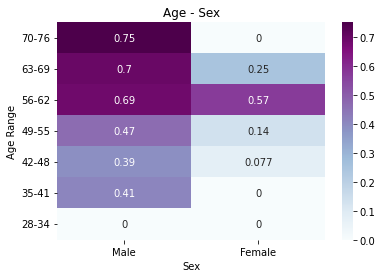

--------------------------------------------------


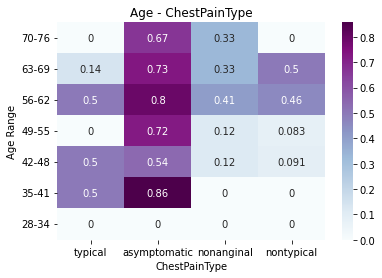

--------------------------------------------------


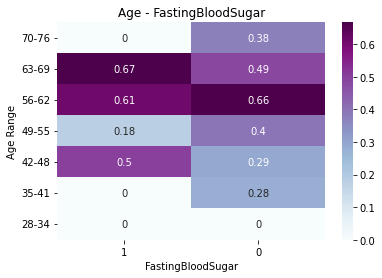

--------------------------------------------------


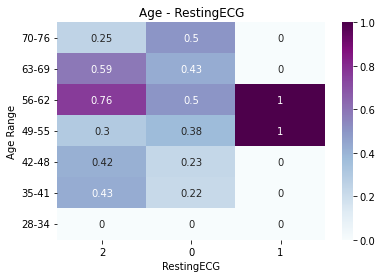

--------------------------------------------------


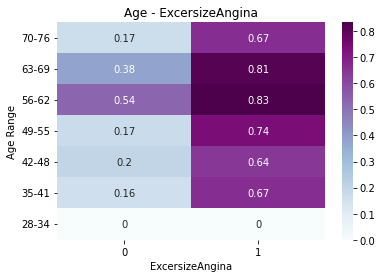

--------------------------------------------------


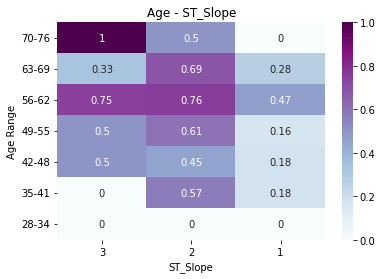

--------------------------------------------------


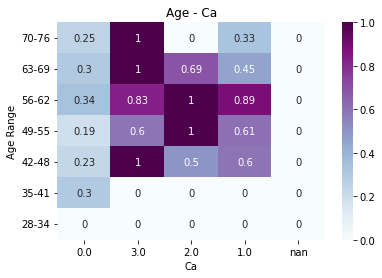

--------------------------------------------------


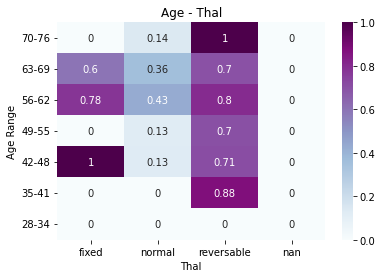

--------------------------------------------------


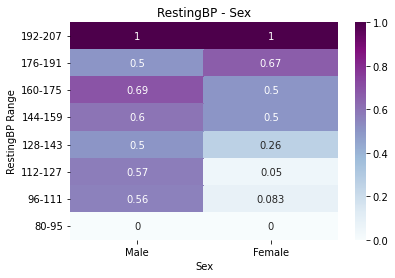

--------------------------------------------------


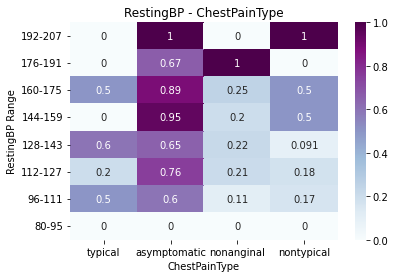

--------------------------------------------------


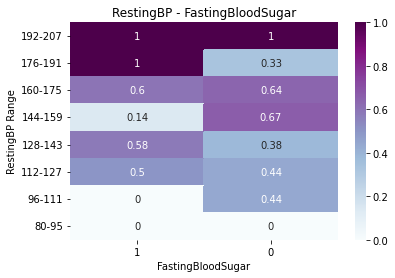

--------------------------------------------------


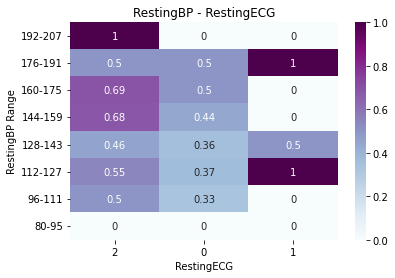

--------------------------------------------------


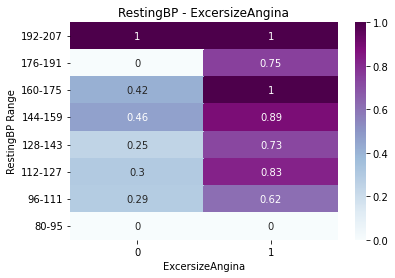

--------------------------------------------------


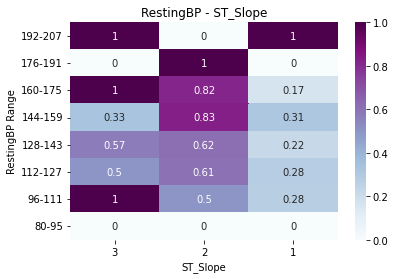

--------------------------------------------------


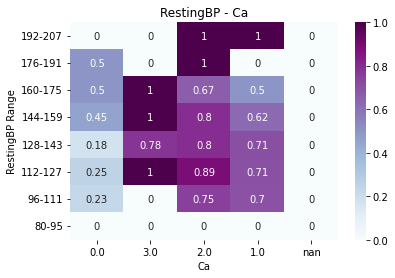

--------------------------------------------------


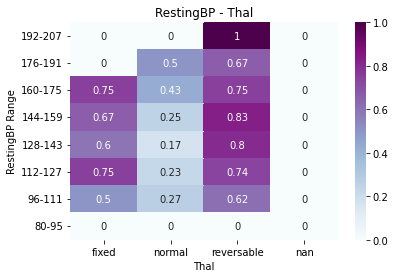

--------------------------------------------------


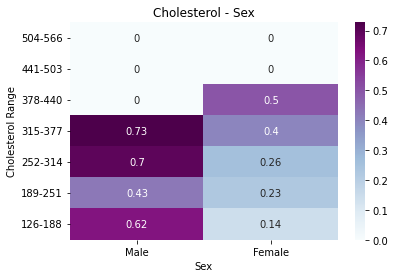

--------------------------------------------------


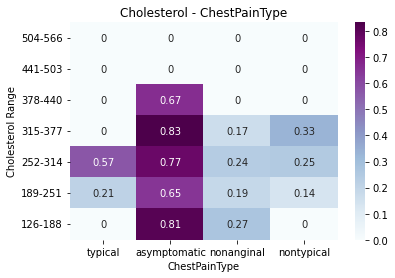

--------------------------------------------------


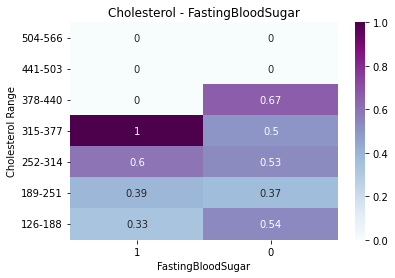

--------------------------------------------------


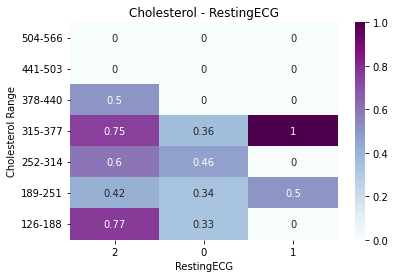

--------------------------------------------------


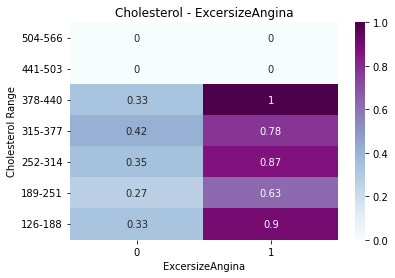

--------------------------------------------------


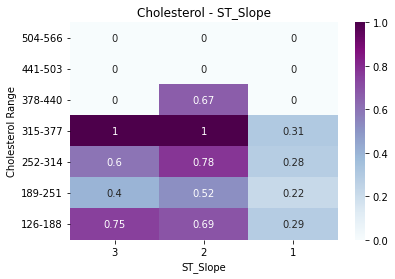

--------------------------------------------------


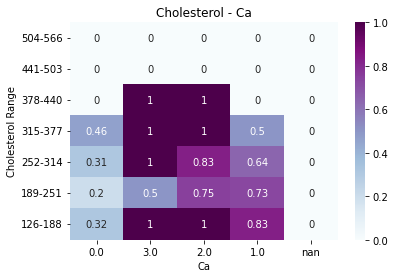

--------------------------------------------------


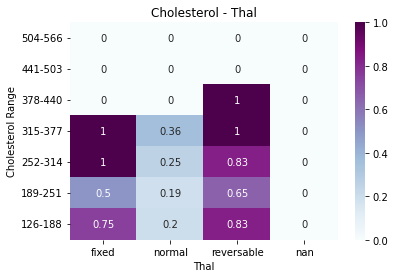

--------------------------------------------------


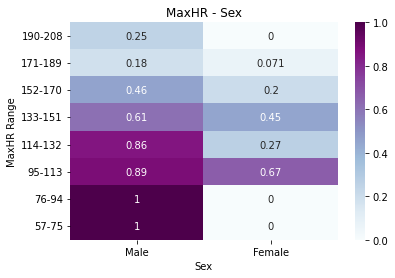

--------------------------------------------------


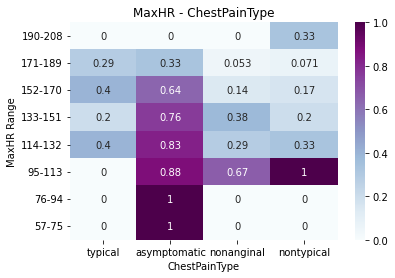

--------------------------------------------------


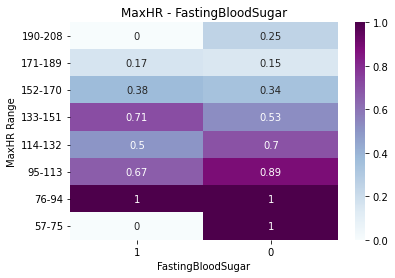

--------------------------------------------------


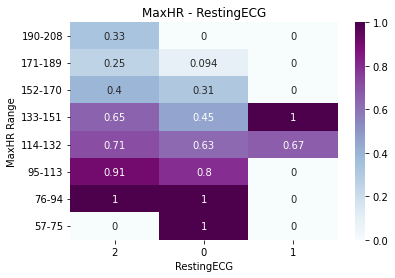

--------------------------------------------------


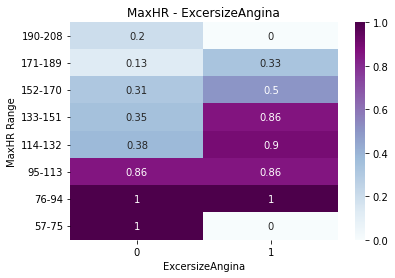

--------------------------------------------------


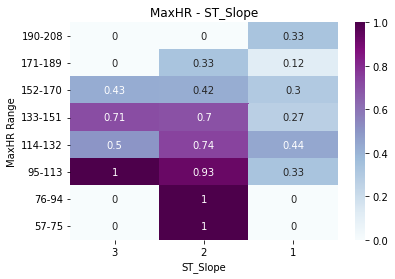

--------------------------------------------------


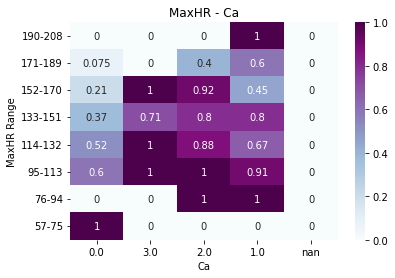

--------------------------------------------------


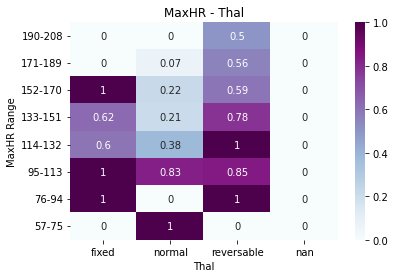

--------------------------------------------------


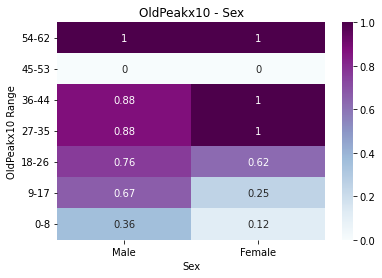

--------------------------------------------------


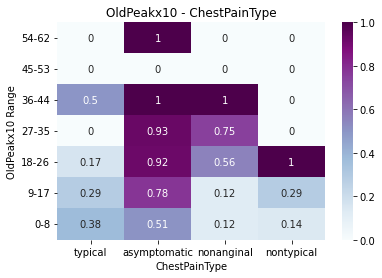

--------------------------------------------------


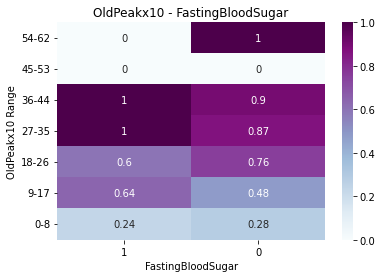

--------------------------------------------------


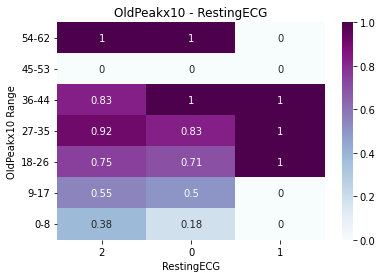

--------------------------------------------------


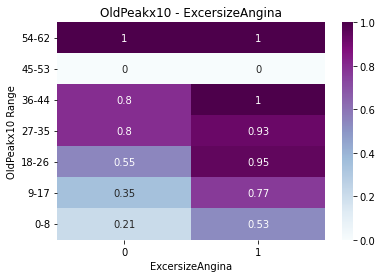

--------------------------------------------------


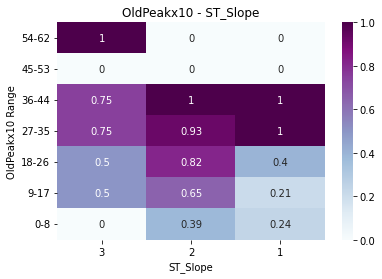

--------------------------------------------------


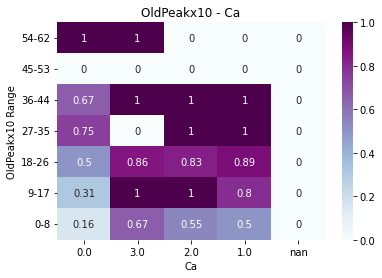

--------------------------------------------------


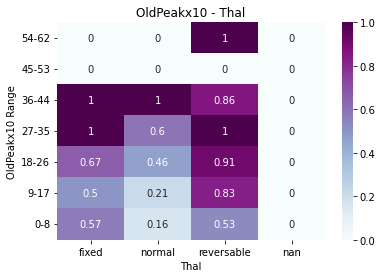

--------------------------------------------------


In [481]:
for n in numerical:
  for c in categorical[:-1]:
    if n != 'OldPeak':
      ourHeatmapNumerical(n,c)
      print('-'*50)

## Numerical Numerical and AHD

<Figure size 432x288 with 0 Axes>

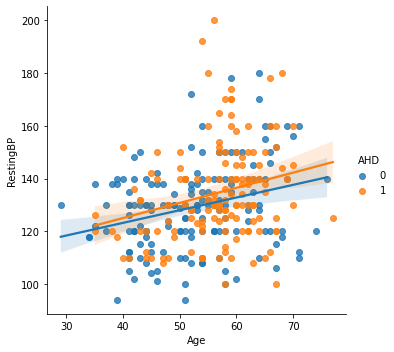

<Figure size 432x288 with 0 Axes>

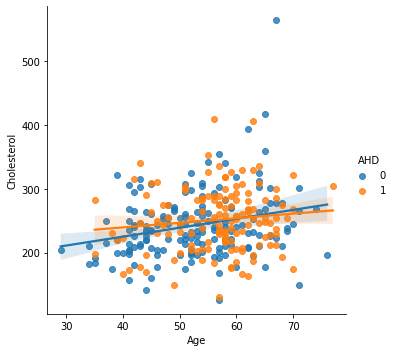

<Figure size 432x288 with 0 Axes>

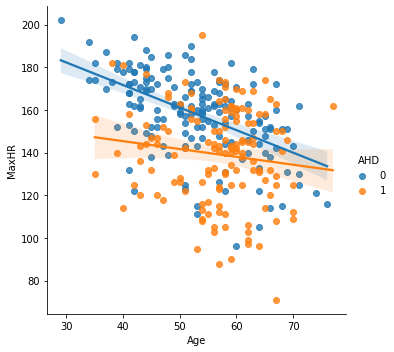

<Figure size 432x288 with 0 Axes>

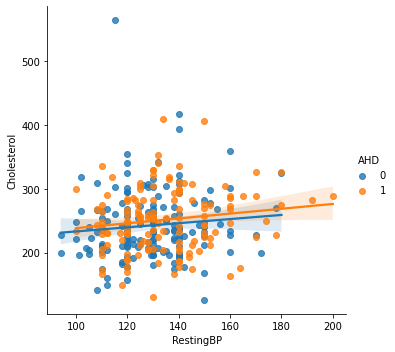

<Figure size 432x288 with 0 Axes>

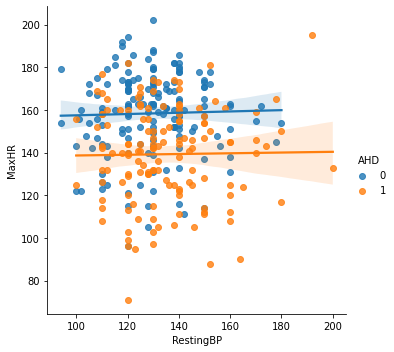

<Figure size 432x288 with 0 Axes>

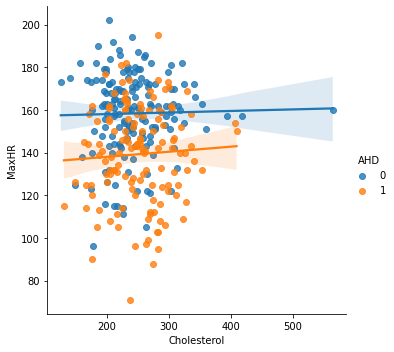

In [482]:
for i,xI in enumerate(numerical[:-1]):
  for yI in numerical[i+1:-1]:
    plt.figure()
    map = sns.lmplot(x=xI, y=yI, hue="AHD",data=df)

In [483]:
# As we noted at the beginning we dropped many unnecessary data parts from aditional dataset.

df2New=df2[['Year','LocationAbbr','Category','Topic','Data_Value_Type','Data_Value','Data_Value_Unit','Break_Out_Category','Break_out','GeoLocation']]
df2New= df2New[df2New['Data_Value_Type']=='Crude']

df2New=df2New.drop(['Data_Value_Type'], axis=1)

df2New= df2New[df2New['Category']=='Cardiovascular Diseases'].drop(['Category'],axis=1)

df2New.fillna(0)

,Year,LocationAbbr,Topic,Data_Value,Data_Value_Unit,Break_Out_Category,Break_out,GeoLocation
1,2011,AL,Major Cardiovascular Disease,11.0,Percent (%),Overall,Overall,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Major Cardiovascular Disease,12.5,Percent (%),Gender,Male,"(32.84057112200048, -86.63186076199969)"
5,2011,AL,Major Cardiovascular Disease,9.6,Percent (%),Gender,Female,"(32.84057112200048, -86.63186076199969)"
6,2011,AL,Major Cardiovascular Disease,0.0,Percent (%),Age,18-24,"(32.84057112200048, -86.63186076199969)"
7,2011,AL,Major Cardiovascular Disease,3.8,Percent (%),Age,25-44,"(32.84057112200048, -86.63186076199969)"
...,...,...,...,...,...,...,...,...
28726,2015,USM,Stroke,4.1,Percent (%),Age,35+,0
28729,2015,USM,Stroke,3.7,Percent (%),Race,Non-Hispanic Black,0
28730,2015,USM,Stroke,0.6,Percent (%),Race,Non-Hispanic Asian,0
28733,2015,USM,Stroke,1.5,Percent (%),Race,Hispanic,0


In [484]:
def categorical_categorical_newData(catx,caty='ChestPainType', newData = df):    ###creates dataframe of two categorical things an thier common numbers

  values=['variables']
  values = values + list(df2New[caty].unique())

  data = pd.DataFrame(columns = values).set_index('variables') 

  valuesx=df2New[catx].unique()

  for i in valuesx:
    
    row=[]
    row.append(i)

    for painType in values[1:]:

      row.append( newData[(newData[caty]==painType) & (newData[catx]==i)]['Data_Value'].mean())

    data.loc[i]=row[1:]
  
  data=data.sort_index(axis=0)

  return data

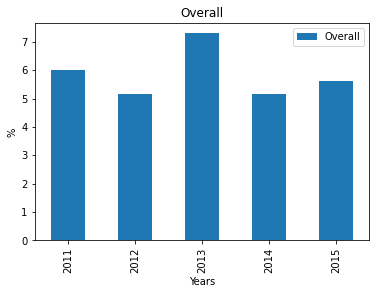

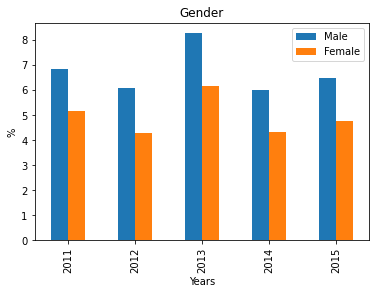

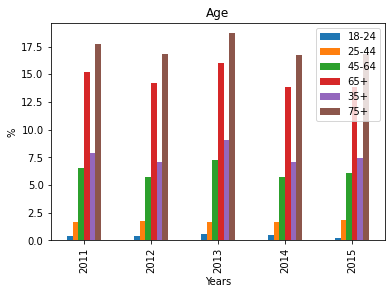

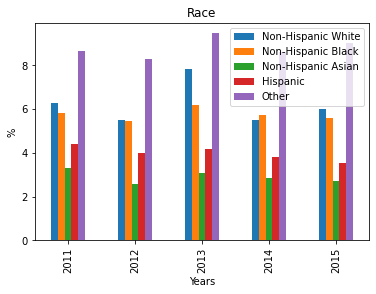

In [485]:
for i in df2New['Break_Out_Category'].unique():
  asd = categorical_categorical_newData('Year','Break_out',df2New[df2New['Break_Out_Category']==i])

  asd = asd[ df2New[ df2New['Break_Out_Category']==i]['Break_out'].unique()]

  asd.plot(kind='bar',xlabel='Years', ylabel='%', title = i)

## Analysis
### Year does not affect dramatically for Age Sex but for Race we see White and black tend to have more heart attacks compared to the hispanic.



## For both existing and new features, and usage of spatial visualization examples (as much as possible) are expected.

## Note: Here only 2011 year is mapped but others can be easily drawn by changing variables.

In [486]:
!pip install geemap
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [487]:
import os
import geemap
import geopandas as gpd
import folium

In [488]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

In [489]:
m = folium.Map(location=[40, -95], zoom_start=4)


In [490]:
mapData2011=df2New[df2New['Year']==2011]
mapData2011=mapData2011[mapData2011["Break_Out_Category"]=='Overall']
mapData2011=mapData2011[mapData2011["LocationAbbr"]!='Median of all states']
mapData2011=mapData2011[mapData2011["Topic"]=='Major Cardiovascular Disease']

mapData2011.head()

,Year,LocationAbbr,Topic,Data_Value,Data_Value_Unit,Break_Out_Category,Break_out,GeoLocation
1,2011,AL,Major Cardiovascular Disease,11.0,Percent (%),Overall,Overall,"(32.84057112200048, -86.63186076199969)"
23,2011,AK,Major Cardiovascular Disease,5.9,Percent (%),Overall,Overall,"(64.84507995700051, -147.72205903599973)"
45,2011,AZ,Major Cardiovascular Disease,8.5,Percent (%),Overall,Overall,"(34.865970280000454, -111.76381127699972)"
67,2011,AR,Major Cardiovascular Disease,11.0,Percent (%),Overall,Overall,"(34.74865012400045, -92.27449074299966)"
89,2011,CA,Major Cardiovascular Disease,6.6,Percent (%),Overall,Overall,"(37.63864012300047, -120.99999953799971)"


In [491]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=mapData2011,
    columns=["LocationAbbr", "Data_Value"],
    key_on="feature.id",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Heart Disease Rate 2011",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [492]:
df_backup=df
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Statistical Analysis

In [493]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from numpy import random


from scipy import stats
from scipy import special

In [494]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestingECG,MaxHR,ExcersizeAngina,OldPeak,ST_Slope,Ca,Thal,AHD,OldPeakx10
1,63,Male,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,23.0
2,67,Male,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,15.0
3,67,Male,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,26.0
4,37,Male,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,35.0
5,41,Female,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,14.0


In [495]:
for i in numerical:
  df = df[(np.abs(stats.zscore(df[i])) < 3)] ### deleting rows that numerical values are 3 standart deviatoin away from mean

In [496]:
df.shape ### 9 data was outlier as it seems

(288, 15)

## Chi Square analysis on categorical attributes

In [497]:
chi_suq_table=pd.DataFrame(columns = ['Category','chi2_stat','DoF','p_value']).set_index('Category')

In [498]:
def chiSquares(cat1, cat2, df):
  asd = categorical_categorical(cat1, cat2, df)

  arr = asd[df[cat2].unique()].to_numpy() 
  arr = arr.tolist()

  ###display(asd) ### displays categorical - AHD number table
 # print()
  #print()

  chi2, p, dof, expected = chi2_contingency(arr)

  chi_suq_table.loc[cat1] = [chi2,dof,p]


In [499]:
for i in categorical[:-1]:
  chiSquares(i,"AHD",df)
display(chi_suq_table)

,chi2_stat,DoF,p_value
Category,,,
Sex,23.871088,1.0,1.030072e-06
ChestPainType,72.553936,3.0,1.211296e-15
FastingBloodSugar,0.000006,1.0,9.981223e-01
RestingECG,9.439389,2.0,8.917901e-03
ExcersizeAngina,50.247571,1.0,1.355223e-12
ST_Slope,41.876111,2.0,8.067111e-10
Ca,70.032468,3.0,4.200551e-15
Thal,79.062123,2.0,6.790132e-18


## T test for Numerical attributes

In [500]:
results = pd.DataFrame(columns = ['Category','mean_0','mean_1','var_0','var_1','p_value']).set_index('Category')

In [501]:
def tTests(num, df):
  df0 = df[df["AHD"] == 0][num]
  df1 = df[df["AHD"] == 1][num]


  fig, ax = plt.subplots(1, 3, figsize=(14,6)) 

  df0.plot(kind="hist", ax=ax[0], bins=20, color="grey", density=True)
  ax[0].set_title("AHD: 0")
  df1.plot(kind="hist", ax=ax[1], bins=20, color="blue", density=True)
  ax[1].set_title("AHD: 1")

  sns.kdeplot(df0, shade=True, ax=ax[2], color="grey")
  sns.kdeplot(df1, shade=True, ax=ax[2], color="blue")
  ax[2].set_title("Comparison with " +  num)

  plt.plot()

  tTresults = stats.ttest_ind(df0, df1, equal_var=False);
  #print(tTresults)
  #print()
  #print()

  mean_0 = df0.mean()
  mean_1 = df1.mean()
  var_0 =df0.var()
  var_1 =df1.var()
  #print(num)
  #print(mean_0)
  #print(mean_1)

  row=[mean_0,mean_1, var_0,var_1,tTresults[1]]
  results.loc[num]=row

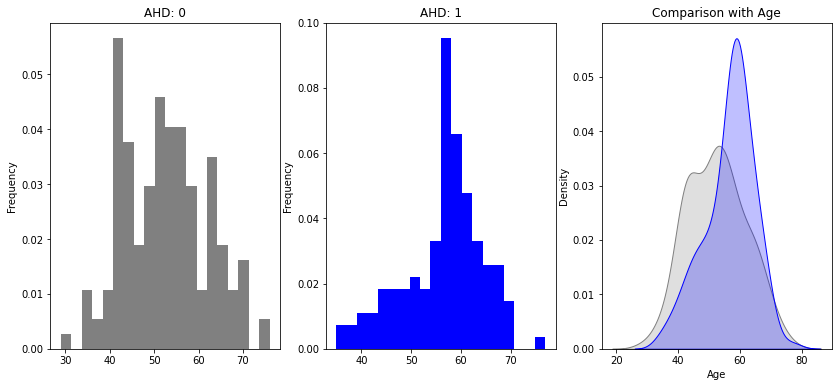

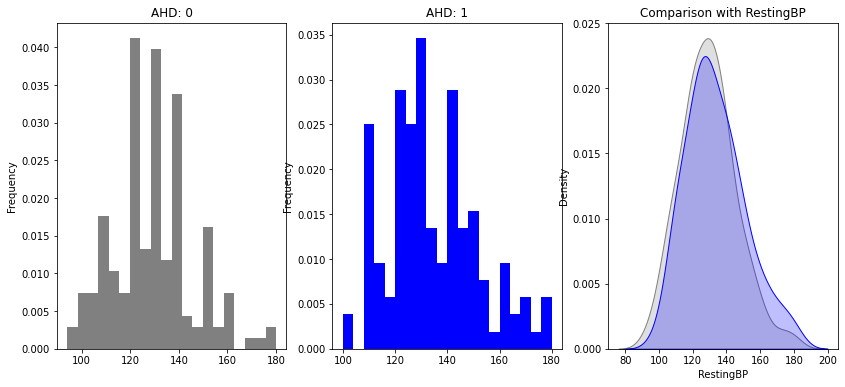

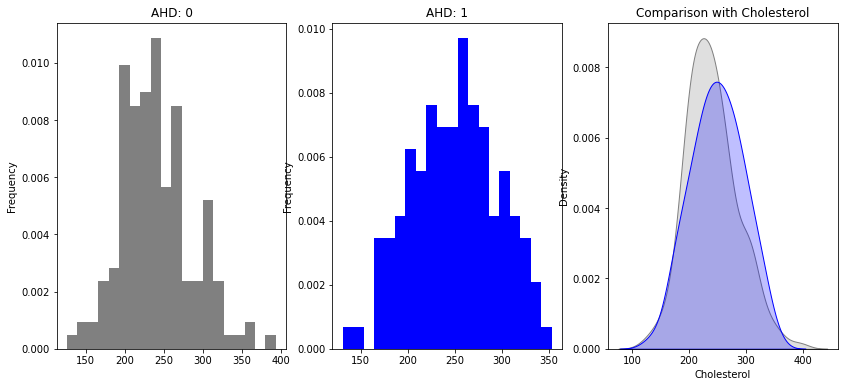

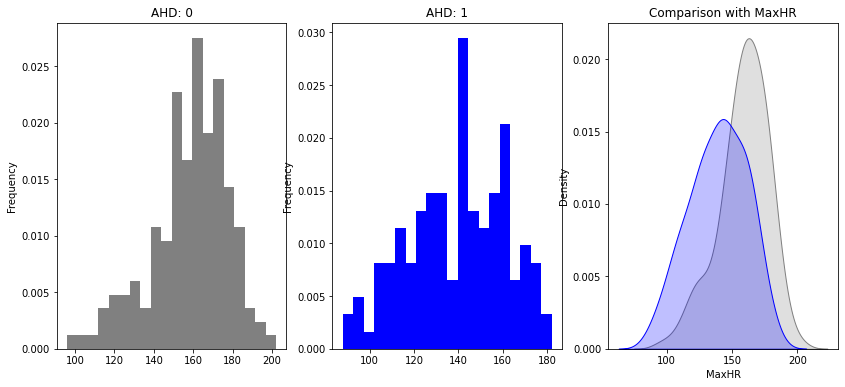

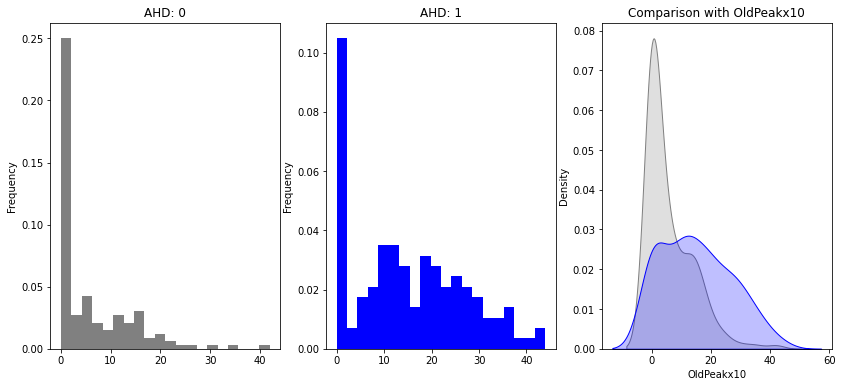

In [502]:
for i in numerical:
  tTests(i,df)

In [503]:
display(results)


,mean_0,mean_1,var_0,var_1,p_value
Category,,,,,
Age,52.474684,56.638462,90.072603,64.356649,7.030127e-05
RestingBP,129.196203,133.453846,269.496291,307.722660,3.581095e-02
Cholesterol,240.367089,249.992308,2070.807063,2131.899165,7.751001e-02
MaxHR,158.582278,139.223077,367.238410,474.252177,6.921725e-14
OldPeakx10,5.911392,15.000000,62.081271,138.480620,1.367676e-12


As p values shown in tables of T test and chi square test
only cholesterol's (0.075) and fasting blood sugar(1.0) p values are higher than %5
which means all other features have real effect on AHD with inverse relation with their p values

## Correlations between Numerical attributes

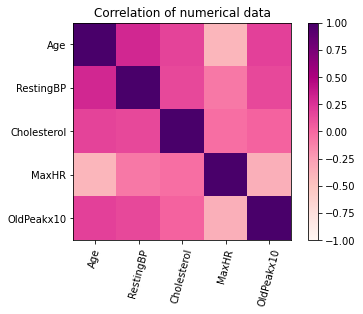

In [504]:
corrs = df[numerical].corr()

plt.title("Correlation of numerical data")
plt.imshow(corrs, cmap="RdPu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

This Actually tell nothing about attributes' contribution to disesase or not but it is good to see correlations between attributes

#Machine Learning

In [505]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [506]:
models = pd.DataFrame(columns=["Model", "Accuracy"]).set_index("Model")

In [507]:
ml_data=df.drop(['AHD','OldPeak'],axis=1)
ml_result=df['AHD']
ml_data["Sex"]=ml_data["Sex"].replace("Female",0)
ml_data["Sex"]=ml_data["Sex"].replace("Male",1)
ml_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestingECG,MaxHR,ExcersizeAngina,ST_Slope,Ca,Thal,OldPeakx10
298,57,0,asymptomatic,140,241,0,0,123,1,2,0.0,reversable,2.0
299,45,1,typical,110,264,0,0,132,0,2,0.0,reversable,12.0
300,68,1,asymptomatic,144,193,1,0,141,0,2,2.0,reversable,34.0
301,57,1,asymptomatic,130,131,0,0,115,1,2,1.0,reversable,12.0
302,57,0,nontypical,130,236,0,2,174,0,2,1.0,normal,0.0


##Prediction of heart disease given values of age, sex, chest pain and RestBP

Two models decision Tree and Random Forest

In [508]:
ml_data_1 = ml_data[['Age','Sex','ChestPainType','RestingBP']]

In [509]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_1, ml_result, test_size=0.25,
                                                random_state=0)

In [510]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP
298,57,0,asymptomatic,140
203,57,1,nonanginal,150
228,67,0,nonanginal,152
237,56,1,asymptomatic,130
141,59,1,nontypical,140


### Shaping Data

In [511]:
def encode(X_train, X_test):
  #Encoding string values to integers such(0,1,2) for decision trees

  # Get list of categorical variables
  s = (X_train.dtypes == 'object')
  object_cols = list(s[s].index)


  for c in object_cols:
    if c in categorical:
      values = X_train[c].unique()
      values.sort()  
      for n, v in enumerate(values):
        X_train[c] = X_train[c].replace(v,n) 
        X_test[c] = X_test[c].replace(v,n) 



In [512]:
encode(X_train, X_test)

### Making model

In [513]:
model_dt = tree.DecisionTreeClassifier(random_state=0) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In this version default of estimators will be 100) => after analysis changed to 30
# considering our data amount 150 estimators would be overfitting
model_rf = RandomForestClassifier(n_estimators=30, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [514]:
#Decision Tree Testing
dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))

Decision Tree Accuracy:0.6527777777777778
Random Forest Accuracy:0.6527777777777778


In [515]:
models.loc["Decision Tree(A,S,CP,RestBP)"] = [dt_acc]
models.loc["Random Forest (A,S,CP,RestBP)"] = [rf_acc]

### Finding Better estimator Num (hyper-parameter tuning )

In [516]:
acc_n = pd.DataFrame(columns=["N_estimators", "accuracy"]).set_index("N_estimators")

In [517]:
def get_Acc(n): ### this gets accuracy score of model given number of estimators
  model_rf = RandomForestClassifier(n_estimators=n, random_state=0)
  model_rf.fit(X_train, y_train)
  
  rf_predictions = model_rf.predict(X_test)
  rf_acc = accuracy_score(y_test, rf_predictions)


  acc_n.loc[n] = [rf_acc]

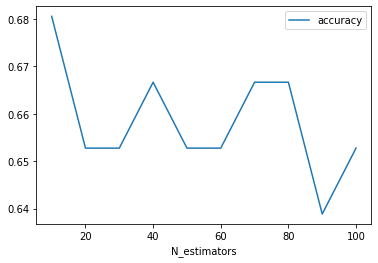

In [518]:
for i in range(10,101,10):
  get_Acc(i)

acc_n.plot(kind="line")

### Feature importance

In [519]:
importances = model_rf.feature_importances_
importance_df=pd.DataFrame(columns=["feature", "importance"]).set_index("feature")
for i,c in enumerate(X_train.columns):
  importance_df.loc[c]=importances[i]

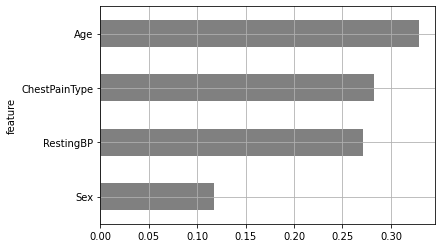

In [520]:
importance_df.sort_values(by=['importance']).plot(kind="barh", grid=True,color="grey", legend=False)

Since this model created because of demand in Project Paper and lack of statistical intuition it performs poorly as expected by our group members

## Creating a model according to our Statistical Analysis

In [521]:
chi_suq_table = chi_suq_table.sort_values(by=['p_value'])
results = results.sort_values(by=['p_value'])

display(chi_suq_table)
display(results)

,chi2_stat,DoF,p_value
Category,,,
Thal,79.062123,2.0,6.790132e-18
ChestPainType,72.553936,3.0,1.211296e-15
Ca,70.032468,3.0,4.200551e-15
ExcersizeAngina,50.247571,1.0,1.355223e-12
ST_Slope,41.876111,2.0,8.067111e-10
Sex,23.871088,1.0,1.030072e-06
RestingECG,9.439389,2.0,8.917901e-03
FastingBloodSugar,0.000006,1.0,9.981223e-01


,mean_0,mean_1,var_0,var_1,p_value
Category,,,,,
MaxHR,158.582278,139.223077,367.238410,474.252177,6.921725e-14
OldPeakx10,5.911392,15.000000,62.081271,138.480620,1.367676e-12
Age,52.474684,56.638462,90.072603,64.356649,7.030127e-05
RestingBP,129.196203,133.453846,269.496291,307.722660,3.581095e-02
Cholesterol,240.367089,249.992308,2070.807063,2131.899165,7.751001e-02


In [522]:
### Selecting most influential attributes from both table 
### which have lower p value than 1E-9

list1=chi_suq_table.index.values.tolist()[:5]
list2=results.index.values.tolist()[:2]
effective_features= list1 + list2

ml_data_2=ml_data[effective_features]

### Creating Model

In [523]:
ml_data_2.head()

,Thal,ChestPainType,Ca,ExcersizeAngina,ST_Slope,MaxHR,OldPeakx10
1,fixed,typical,0.0,0,3,150,23.0
2,normal,asymptomatic,3.0,1,2,108,15.0
3,reversable,asymptomatic,2.0,1,2,129,26.0
4,normal,nonanginal,0.0,0,3,187,35.0
5,normal,nontypical,0.0,0,1,172,14.0


In [524]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_2, ml_result, test_size=0.25, random_state=0)

In [525]:
encode(X_train, X_test) ## encoding string datas

In [526]:
model_dt2 = tree.DecisionTreeClassifier(random_state=0) #Create decision tree classifier object
model_dt2.fit(X_train, y_train)                         #train the classifier using the training data

#Random Forest Training(In this version default of estimators will be 100) => after accuracy testing it seems 30 is better option; 
#we have 300 data points 100 would be overfitting
model_rf2 = RandomForestClassifier(n_estimators=30, random_state=0)
model_rf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [527]:
#Decision Tree Testing
dt_predictions2 = model_dt2.predict(X_test)
dt_acc2 = accuracy_score(y_test, dt_predictions2)


#Random Forest Testing
rf_predictions2 = model_rf2.predict(X_test)
rf_acc2 = accuracy_score(y_test, rf_predictions2)

print("Decision Tree Accuracy:"+str(dt_acc2))
print("Random Forest Accuracy:"+str(rf_acc2))

 ### Accuracy is higher than using only Age Sex RestBP Chestpaintype
 ### Which is not suprising because of better selection of features according to statistical analysis

Decision Tree Accuracy:0.7638888888888888
Random Forest Accuracy:0.8333333333333334


In [528]:
models.loc["Decision Tree(Statistic)"] = [dt_acc2]
models.loc["Random Forest Tree(Statistic)"] = [rf_acc2]

#### Finding Better estimator Num (hyper-parameter tuning )

In [529]:
def get_Acc2(n): ##accuracy function for second model
  model_rf2 = RandomForestClassifier(n_estimators=n, random_state=0)
  model_rf2.fit(X_train, y_train)
  
  rf2_predictions = model_rf2.predict(X_test)
  rf_acc2 = accuracy_score(y_test, rf2_predictions)


  acc_n.loc[n] = [rf_acc2]

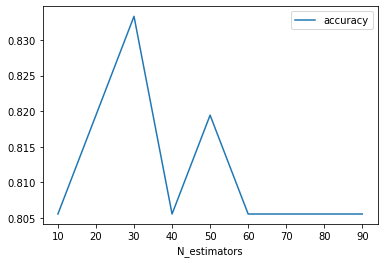

In [530]:
acc_n = pd.DataFrame(columns=["N_estimators", "accuracy"]).set_index("N_estimators")
for i in range(10,100,10):
  get_Acc2(i)

acc_n.plot(kind="line")

#### Importance levels

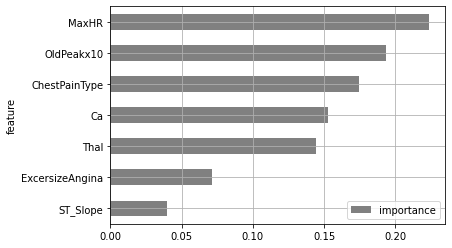

In [531]:
importances = model_rf2.feature_importances_
importance_df=pd.DataFrame(columns=["feature", "importance"]).set_index("feature")
for i,c in enumerate(X_train.columns):
  importance_df.loc[c]=importances[i]
importance_df.sort_values(by=["importance"]).plot(kind="barh", grid=True, color="grey")

## Trying to Use Models only using Categorical or Numerical Values

### Logistic Regression

In [532]:
ml_data_3=ml_data[numerical]

In [533]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_3, ml_result, test_size=0.25, random_state=0)

In [534]:
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,OldPeakx10
298,57,140,241,123,2.0
203,57,150,126,173,2.0
228,67,152,277,172,0.0
237,56,130,283,103,16.0
141,59,140,221,164,0.0


In [535]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [536]:
lr_predictions = model_lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Accuracy ", lr_acc) 

## considering lack of categorical feature which are usually has low p values meaning not using very valuable source, accuracy is normal to be that low

Logistic Regression Accuracy  0.6944444444444444


In [537]:
models.loc["Logistic Reg(Numerical)"] = [lr_acc]

### Random Forest with only Categorical

In [538]:
ml_data_5=ml_data[categorical[:-1]]

In [539]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_5, ml_result, test_size=0.25, random_state=0)

In [540]:
encode(X_train, X_test)

In [541]:
model_rf3 = RandomForestClassifier(n_estimators=36, random_state=0)
model_rf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=36, random_state=0)

In [542]:
#Decision Tree Testing
rf_predictions3 = model_rf3.predict(X_test)
rf_acc3 = accuracy_score(y_test, rf_predictions3)

print("Accuracy with only categorical data is: ", rf_acc3 ) ### pretty high

Accuracy with only categorical data is:  0.7638888888888888


#### Testing number of Estimators

In [543]:
def get_Acc3(n): ##accuracy function for third RF model
  model_rf3 = RandomForestClassifier(n_estimators=n, random_state=0)
  model_rf3.fit(X_train, y_train)
  
  rf3_predictions = model_rf3.predict(X_test)
  rf_acc3 = accuracy_score(y_test, rf3_predictions)


  acc_n.loc[n] = [rf_acc3]

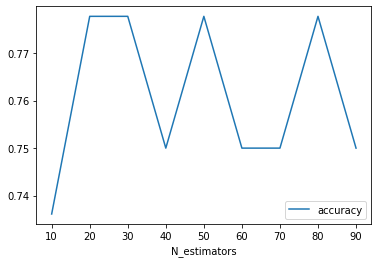

In [544]:
acc_n = pd.DataFrame(columns=["N_estimators", "accuracy"]).set_index("N_estimators")
for i in range(10,100,10):
  get_Acc3(i)

acc_n.plot(kind="line")

In [545]:
models.loc["RF (categorical)"] = [rf_acc3]

## Experiment with deep learning

As we have seen in lecture artificial neural networks handle selection of features too. We want to observe success rate of such an algorithm compared to previous models that we carefully selected features according to statistical analysis  

In [546]:
from tensorflow import keras
from keras import layers

In [547]:
ml_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestingECG,MaxHR,ExcersizeAngina,ST_Slope,Ca,Thal,OldPeakx10
1,63,1,typical,145,233,1,2,150,0,3,0.0,fixed,23.0
2,67,1,asymptomatic,160,286,0,2,108,1,2,3.0,normal,15.0
3,67,1,asymptomatic,120,229,0,2,129,1,2,2.0,reversable,26.0
4,37,1,nonanginal,130,250,0,0,187,0,3,0.0,normal,35.0
5,41,0,nontypical,130,204,0,2,172,0,1,0.0,normal,14.0


In [548]:
ml_data_4 = ml_data

In [549]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_4, ml_result, test_size=0.25,
                                                random_state=0)

In [550]:
encode(X_train,X_test)

In [551]:
dl_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[13]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [552]:
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [553]:
history = dl_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=100, 
)

Epoch 1/100
2/2 [==============================] - 2s 384ms/step - loss: 13.2081 - binary_accuracy: 0.4537 - val_loss: 20.2345 - val_binary_accuracy: 0.5278
Epoch 2/100
2/2 [==============================] - 0s 76ms/step - loss: 15.7679 - binary_accuracy: 0.5556 - val_loss: 1.9452 - val_binary_accuracy: 0.5278
Epoch 3/100
2/2 [==============================] - 0s 52ms/step - loss: 4.6219 - binary_accuracy: 0.4815 - val_loss: 9.2553 - val_binary_accuracy: 0.4722
Epoch 4/100
2/2 [==============================] - 0s 57ms/step - loss: 8.8763 - binary_accuracy: 0.4444 - val_loss: 3.0594 - val_binary_accuracy: 0.4722
Epoch 5/100
2/2 [==============================] - 0s 58ms/step - loss: 2.2568 - binary_accuracy: 0.5231 - val_loss: 3.1516 - val_binary_accuracy: 0.5278
Epoch 6/100
2/2 [==============================] - 0s 61ms/step - loss: 2.9680 - binary_accuracy: 0.5556 - val_loss: 2.1312 - val_binary_accuracy: 0.5278
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 

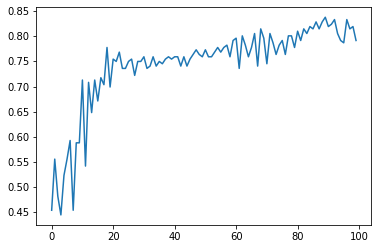

In [554]:
history_df = pd.DataFrame(history.history)
history_df['binary_accuracy'].plot(kind="line"); 

## result is astonishing accuracy can go as high as 80-85% without any feature selection processes, but overfitting seems possible in this model
## it should be noted that in every deep learning trial we get different accuracy rates

In [555]:
models.loc["Deep Learning"] = [history_df['binary_accuracy'].iloc[-1]]

## Accuracy of models


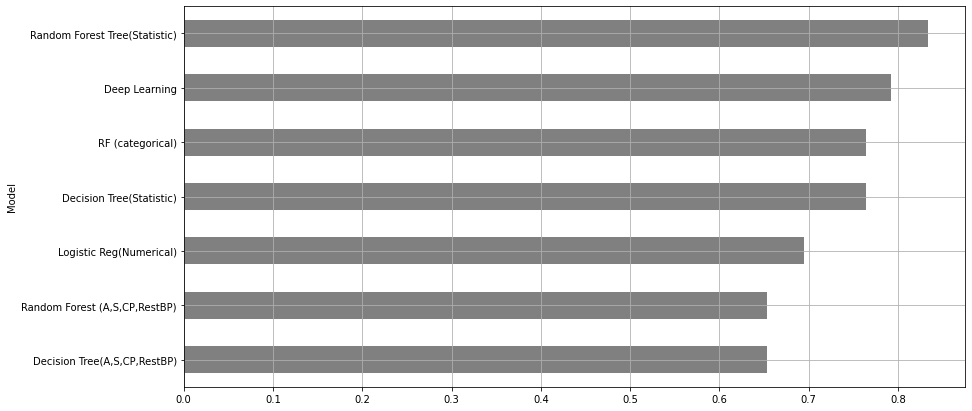

In [556]:
models.sort_values(by ="Accuracy").plot(kind="barh", legend=False, grid=True, color="grey", figsize=(14,7))

# User System

In [558]:
user={}

print("Fill the inputs")
user["Age"] = (input("Age: "))
user["Sex"] = (input("Sex(M: 1 /F: 0 ): "))
user["ChestPainType"] = (input("ChestPainType(asymptomatic: 0 /nonanginal: 1 /nontypical: 2 /typical: 3): "))
user["RestingBP"] = (input("RestingBP: "))
user["Cholesterol"] = (input("Cholesterol: "))
user["FastingBloodSugar"] = (input("FastingBloodSugar (>120: 1 / <120: 0): "))
user["RestingECG"] = (input("RestingECG (normal: 0,  ST-T wave abnormality: 1 , showing probable or definite left ventricular hypertrophy by Estes' criteria: 2): "))
user["MaxHR"] = (input("MaxHR: "))
user["ExcersizeAngina"] = (input("ExcersizeAngina (yes: 1 / no: 0): "))
user["OldPeakx10"] = (input("OldPeak: "))
user["ST_Slope"] = (input("ST_Slope (upsloping: 1 , flat: 2, downsloping: 3): "))
user["Ca"] = (input("number of major vessels (aorta, inferior vena cava, pulmonary artery (0,3) ): "))
user["Thal"] = (input("Thal(normal: 0, fixed: 1, reversible: 2): "))


for i in user:
  if user[i]=="":
    user[i]=df[i].mode()[0] ### if user dont give input fill with mode
  user[i]=float(user[i])

user['OldPeakx10']=user['OldPeakx10']*10

user_df = pd.DataFrame(user,index=[0])

prediction = model_rf2.predict(user_df[effective_features])

print("Our prediction about AHD is:")
if prediction[0]:
  print("yes")
else:
  print("no")


Fill the inputs
Age: 80
Sex(M: 1 /F: 0 ): 1
ChestPainType(asymptomatic: 0 /nonanginal: 1 /nontypical: 2 /typical: 3): 0
RestingBP: 150
Cholesterol: 300
FastingBloodSugar (>120: 1 / <120: 0): 1
RestingECG (normal: 0,  ST-T wave abnormality: 1 , showing probable or definite left ventricular hypertrophy by Estes' criteria: 2): 2
MaxHR: 1
ExcersizeAngina (yes: 1 / no: 0): 1
OldPeak: 2
ST_Slope (upsloping: 1 , flat: 2, downsloping: 3): 2
number of major vessels (aorta, inferior vena cava, pulmonary artery (0,3) ): 3
Thal(normal: 0, fixed: 1, reversible: 2): 2
Our prediction about AHD is:
yes
